In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:

plt.rcParams["font.family"] = "Times New Roman"

BatteryDataFull = pd.read_csv('../data/Processed_Data/Battery_Data.csv')
BatteryData = pd.read_csv('../data/Processed_Data/Battery_Data_0129_0529.csv')

BatteryDataFull['datetime'] = pd.to_datetime(BatteryDataFull['datetime'])
BatteryDataFull.set_index('datetime', inplace=True)

BatteryData['datetime'] = pd.to_datetime(BatteryData['datetime'])
BatteryData.set_index('datetime', inplace=True)

In [3]:
df = BatteryData['total'].copy()


# 建立完整時間序列（以最小和最大時間為範圍，freq='H' 代表每小時）
full_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')

# 重新索引補齊時間
df_complete = df.reindex(full_time_index)

# 將 index 還原為欄位（如需要）
df_complete = df_complete.rename_axis('datetime').reset_index()

df_complete = df_complete.ffill()

/tmp/ipykernel_549781/2153507785.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')


In [4]:
df_complete

,datetime,total
0,2024-01-29 00:00:00,34.0
1,2024-01-29 01:00:00,40.0
2,2024-01-29 02:00:00,42.0
3,2024-01-29 03:00:00,42.0
4,2024-01-29 04:00:00,42.0
...,...,...
2923,2024-05-29 19:00:00,30.0
2924,2024-05-29 20:00:00,26.0
2925,2024-05-29 21:00:00,26.0
2926,2024-05-29 22:00:00,46.0


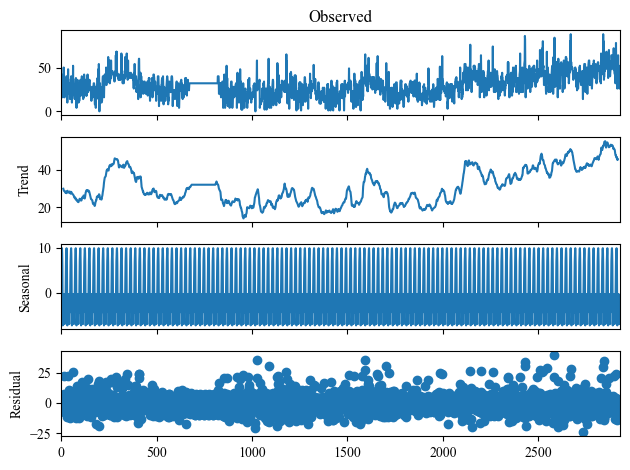

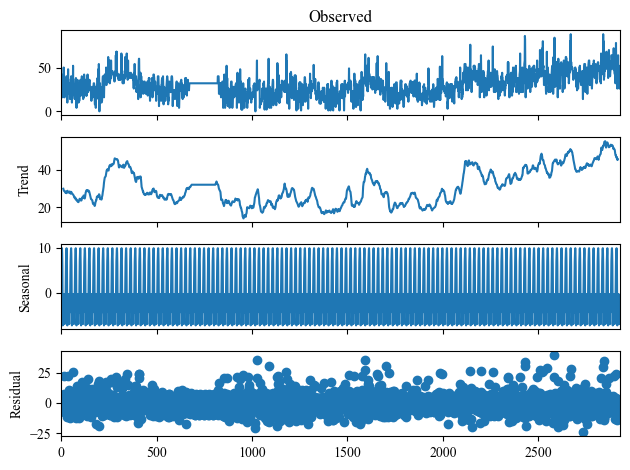

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_complete.iloc[:,1].values, model='additive', period=24)  # 若為每小時資料，period 可能為 24
result.plot()

In [6]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 218.8 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 KB 327.4 kB/s eta 0:00:00a 0:00:01
